In [4]:
import networkx as nx
import matplotlib.pyplot as plt

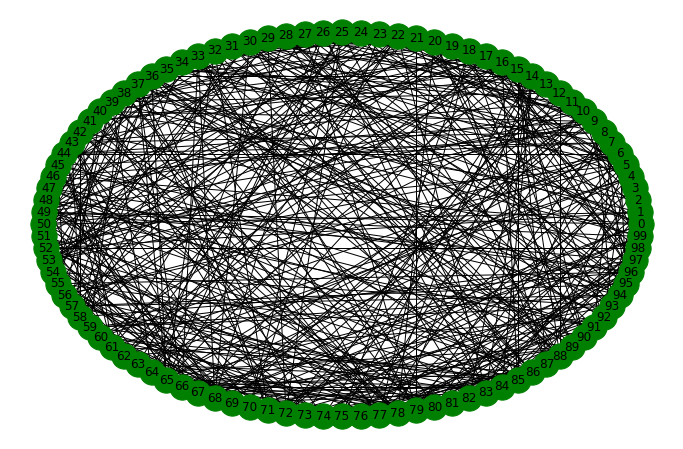

Average clustering:
0.09733765417588941
Transitivity:
0.09923518164435946
<k>:
10.34
Density:
0.10444444444444445


In [64]:
#Generate an Erdos-Renyi graph
G = nx.erdos_renyi_graph(100, 0.1, seed=None, directed=False)

#use a ring layout to spread nodes for drawing
pos = nx.circular_layout(G)

plt.figure(figsize=(12,8))
nx.draw_networkx(G, pos=pos, node_color="green", node_size=640)
limits=plt.axis('off')
plt.show()

print('Average clustering:')
print(nx.average_clustering(G))
print('Transitivity:')
print(nx.transitivity(G))

print('<k>:')
totalDegree = 0.0000

for x in range(0, 100):
    totalDegree += G.degree[x]

print(totalDegree/100)

print('Density:')
print(nx.density(G))
#print(diameter(G, e=None, usebounds=False))

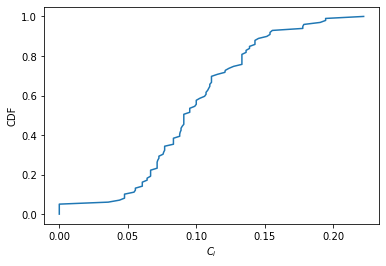

In [65]:
import numpy as np

#create a CDF of C_i
ci_list=[]
ci_dict=nx.clustering(G)

for node in ci_dict:
    ci_list.append(float(ci_dict[node]))
    
sorted_ci=np.sort(ci_list)

#implementation of CDF
yvals=np.arange(len(sorted_ci))/float(len(sorted_ci)-1)


# Plot the data
plt.plot(sorted_ci, yvals)

#Add labels
plt.ylabel("CDF")
plt.xlabel('$C_i$')
plt.show()

In [66]:
#Watts-Strogatz model
#G(N,k,p), Number of nodes, k is number of connected nearest neighbors,
#           p is 0-1 probability to connect to random other node (rewire the k connection)

#watts_strogatz_graph(n, k, p, seed=None)

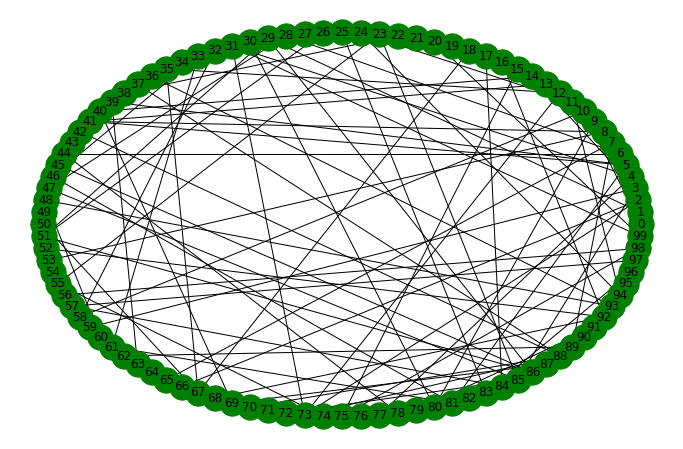

Average Clustering Coeff:0.04
Transitivity:0.043478260869565216
Average Degree:2.0
Diameter:

NetworkXError: Found infinite path length because the graph is not connected

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate Erdos Renyi graph
G = nx.watts_strogatz_graph(100,2,8)

# use a ring layout to spread nodes for drawing
pos = nx.circular_layout(G)
plt.figure(figsize=(12,8))
nx.draw_networkx(G, pos=pos, node_color="green", node_size = 640)
limits = plt.axis('off')
plt.show()

avg_clust = nx.average_clustering(G)
print('Average Clustering Coeff:', end='')
print(avg_clust)

trans = nx.transitivity(G)
print('Transitivity:', end='')
print(trans)

avg_deg = nx.degree(G)
print('Average Degree:', end='')
print(sum([y for x,y in avg_deg])/len(G.nodes()))
print('Diameter:', end='')
print(nx.diameter(G))
print('Avg path length:', end='')
print(nx.average_shortest_path_length(G))
import statistics
ci_list=[]
ci_dict=nx.clustering(G)
for node in ci_dict:
    ci_list.append(float(ci_dict[node]))
print('STD:', end='')
print(statistics.stdev(ci_list))